## Importing Libraries that will be used

In [24]:
import time
from datetime import datetime
import json
import random 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import tqdm.notebook as tq 

# This will load the fields list
import fields
fieldsFilter = fields.fields

Cleaning Functions

In [27]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def remove_user_mentions(text):
    clean_tweet = re.sub("@[A-Za-z0-9_]+","", text)
    clean_tweet = re.sub("#[A-Za-z0-9_]+","", clean_tweet)
    return clean_tweet

def change_to_lowercase(text):
    return text.lower()    

def remove_connecting_words(text):    
    clean_tweet = re.sub('\s+(a|an|and|the|is|from|as|our|it|in|the|i|by|at|to|of|or|he|on|be|this|up|so|are|has|if|was|for|we)(\s+)', '\2', text)
    return clean_tweet

def remove_returnchar(text):
    clean_tweet = text.replace('\r','')
    return clean_tweet

def remove_newlines(text):
    clean_tweet = text.replace('\n','')
    return clean_tweet



Creat a small sample data

In [28]:
no_samples = "200"
list_tweets = None

with open("./tweets/20200916.json", "r") as myfile:
    list_tweets = list(myfile)

if int(no_samples) > len(list_tweets):
    no_samples = len(list_tweets)

sample = random.sample(list_tweets, int(no_samples))

file = open("sample_data.json", "w")
for i in sample:
  file.write(i)
file.close() #This close() is important

Processing functions

In [29]:
complete_tweets = []
with open('./tweets/sample_data.json', 'r') as f:
    for line in f:
        complete_tweets.append(json.loads(line))   

#Replace the spaces and enters
tweet_df = pd.json_normalize(complete_tweets)   
tweet_df = tweet_df.loc[:, tweet_df.columns.isin(fieldsFilter)]
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_newlines(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_returnchar(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_urls(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_twitter_urls(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_emoticons(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_emoji(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : give_emoji_free_text(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_user_mentions(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : change_to_lowercase(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_connecting_words(x))

tweet_df.to_csv(r'cleaned_tweets\sample.csv')


In [30]:
tweet_df.head()

,created_at,text,in_reply_to_screen_name,retweet_count,favorite_count,source,id_str
0,Wed Sep 16 15:13:19 +0000 2020,so all you that say trump never downplayed cov...,None,0,0,Twitter for Android,1306249815261622272
1,Wed Sep 16 15:29:26 +0000 2020,coronavirus: yorkshire quartet outt20 blast g...,None,0,0,SocialFlow,1306253872424460291
2,Wed Sep 16 19:53:28 +0000 2020,cdc: almost allthe us kidsteens who've died...,None,1,3,Twitter Web App,1306320315438362624
3,Wed Sep 16 19:11:56 +0000 2020,fellow south africans must one day tell ukuthi...,None,27,101,Twitter for Android,1306309865485238272
4,Wed Sep 16 14:36:04 +0000 2020,"ahmedabad adds 165 covid-19 cases, taking tall...",None,4,79,PTI_Tweets,1306240441537314816


Top 50 most unique words used from the dataset 

        Word  Frequency
    covid-19         18
        that         13
       &amp;         12
           -         12
        with         11
         not         11
       about         10
         you          9
       trump          9
        your          9
 coronavirus          9
        will          8
          do          7
           …          7
         his          7
         how          7
        have          7
       after          6
         all          6
         one          6
         via          6
         who          5
        were          5
       would          5
    pandemic          5
         but          5
         new          5
        they          5
         the          5
        test          5
        this          4
      should          4
      deaths          4
      health          4
        must          4
           |          4
        keep          4
     testing          4
       staff   

<AxesSubplot:title={'center':'Top 50 most unique words used from the dataset'}, ylabel='Frequency'>

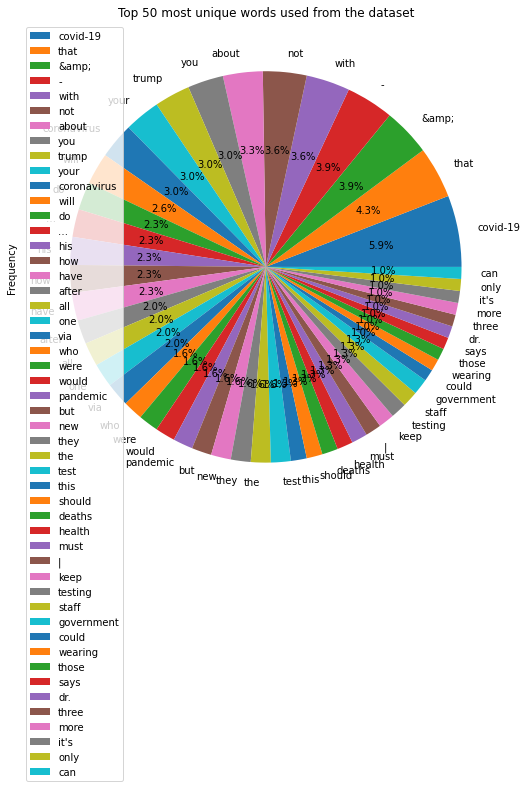

In [12]:
no_top_unique_words = "50" #@param {type:"string"}

result = Counter(" ".join(tweet_df['text'].values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')

Run for the entire dataset